In [34]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [12]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [16]:
predictions[:5]

array([ 83.14368892,  91.62904111, 137.36578932, 105.89945922,
       174.83605602])

Text(0, 0.5, 'Predictions')

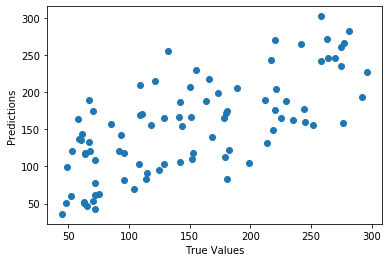

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [20]:
print ("Score : ", model.score(X_test, y_test))

Score :  0.4633656949319895


In [22]:
from sklearn.model_selection import KFold
import numpy as np
X = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [23]:
for train_index, test_index in kf.split(X):
    print("TRAIN: ", train_index, "TEST: ", test_index )
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:  [2 3] TEST:  [0 1]
TRAIN:  [0 1] TEST:  [2 3]


In [37]:
scores = cross_val_score(model, df, y, cv=6)
print(scores)

[0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


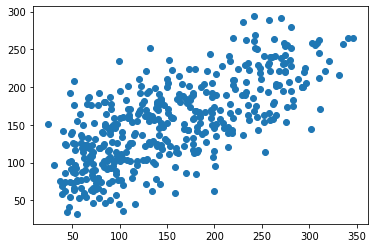

In [43]:
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [44]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640776
